Composite analysis is a commonly used statistical technique to determine some of the basic structural characteristics of a meteorological or climatological phenomenon that are difficult to observe in totality (such as a hurricane, a squall line thunderstorm, or a cold front), or phenomenon which occur over time (e.g., the weather/climate over a given geographic area). Composite Analysis is one of those very recurrent and celebrated methods of climate science, which could be quite useful for exploring the large scale impacts of teleconnections from modes of atmospheric variability such as El Nino.

There are a number of steps necessary to form composites of any given phenomenon (Lee, 2011).

The first step is choosing a basis for the analysis, more specifically a positive and negative basis must be chosen. For example, in some work on ENSO composite analysis, generally the positive basis is used to describe El Niño events, and the negative basis is used to describe La Niña events.
After the basis is formed, and events chosen, these events are then averaged, and the positive and negative averaged events are subtracted from one another.
Finally, statistical significance is determined by using a two tailed student-t test, and for the cases evaluated, the confidence interval is generally set at 0.95.
In this notebook, we will carry out a primary composite study of the El Niño influence on the precipitation over the Southern Africa. This notebook extended the idea from Tristan Hauser, so credit should also go to him.

Author Marie-Aude Pradal

In [1]:
import numpy as np               
import pandas as pd              
import xarray as xr

import matplotlib.pyplot as plt  
import matplotlib as mpl          
import seaborn as sns
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from helpers import *

%matplotlib inline                
_ = plt.xkcd()

1. Identify El Niño events

El Niño/Southern Oscillation (ENSO) is an irregularly periodic variation in winds and sea surface temperatures over the tropical eastern Pacific Ocean, which is the most important coupled ocean-atmosphere phenomenon to cause global climate variability on interannual time scales. The warming phase of the sea temperature is known as El Niño and the cooling phase as La Niña. The extremes of this climate pattern's oscillations cause extreme weather (such as floods and droughts) in many regions of the world. Developing countries dependent upon agriculture and fishing, particularly those bordering the Pacific Ocean, are the most affected.

There are many separate indices available to describe ENSO events. Here Multivariate ENSO Index (MEI) was used. In the interest of determining a full affect of both the atmospheric and oceanic aspects of ENSO, the MEI has been utilized as equatorial Pacific variables of both the atmosphere and ocean go into the formation of this index (Wolter, 1998). As the MEI indices are scaled by variability, we take any MEI value>1 to be an El Niño event.

In [2]:
plt.rcParams['font.family'] = 'Arial'

   Year   Jan   Feb   Mar   Apr   May   Jun   Jul   Aug   Sep   Oct   Nov  \
0  1979  0.47  0.29 -0.05  0.21  0.27 -0.11 -0.11  0.47  0.38  0.23  0.53   
1  1980  0.33  0.20  0.39  0.51  0.45  0.55  0.47  0.03  0.12  0.02 -0.07   
2  1981 -0.36 -0.23  0.33  0.43 -0.24 -0.70 -0.61 -0.34 -0.07 -0.16 -0.27   
3  1982 -0.43 -0.49 -0.27 -0.36 -0.12  0.62  1.65  1.91  1.69  1.78  2.14   
4  1983  2.48  2.68  2.61  2.76  2.86  1.98  0.63 -0.17 -0.49 -0.53 -0.47   

    Dec  
0  0.63  
1 -0.12  
2 -0.19  
3  2.37  
4 -0.50  


/var/folders/sr/0fxh2nn57rv_jfz1srn_p_zw0000gn/T/ipykernel_12149/2627196745.py:6: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv('/Users/marie-audepradal/Documents/enso_indices.txt', delim_whitespace=True, header=None, names=columns)


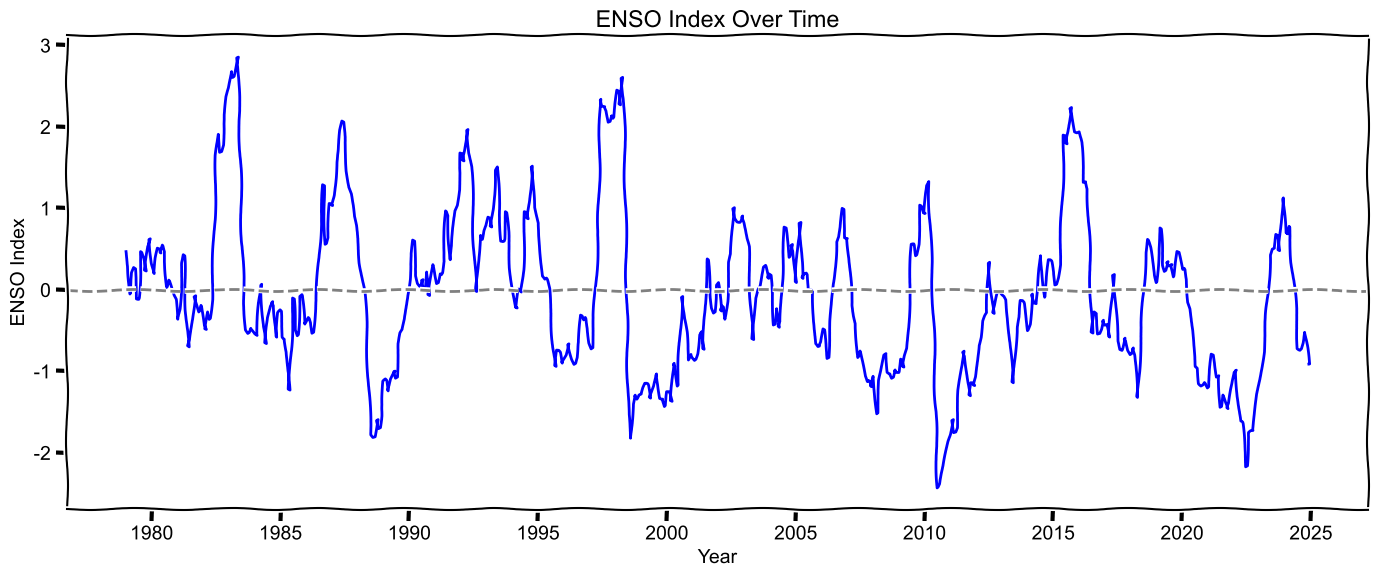

In [3]:
# Define the column names (Year + 12 months)
columns = ['Year', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
           'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Read the file into a DataFrame
df = pd.read_csv('/Users/marie-audepradal/Documents/enso_indices.txt', delim_whitespace=True, header=None, names=columns)

# Display the first few rows
print(df.head())

# Convert to long format
df_long = df.melt(id_vars='Year', var_name='Month', value_name='ENSO_Index')

# Convert to datetime for proper x-axis
month_to_num = {'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'Jun': 6,
                'Jul': 7, 'Aug': 8, 'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12}
df_long['Month_Num'] = df_long['Month'].map(month_to_num)
df_long['Date'] = pd.to_datetime(dict(year=df_long['Year'], month=df_long['Month_Num'], day=1))

# Sort by date
df_long = df_long.sort_values('Date')
# Plot the continuous time series
plt.figure(figsize=(14, 6))
plt.plot(df_long['Date'], df_long['ENSO_Index'], label='ENSO Index', color='blue')
plt.axhline(0, color='gray', linestyle='--')
plt.title('ENSO Index Over Time')
plt.xlabel('Year')
plt.ylabel('ENSO Index')
plt.grid(True)
plt.tight_layout()
plt.show()

fill with color the events corresponding to nino index GT 1

plot extreme values: nino index <=1.5 or >1.5

In [4]:
ensoLB=2
ensoUB=2.5

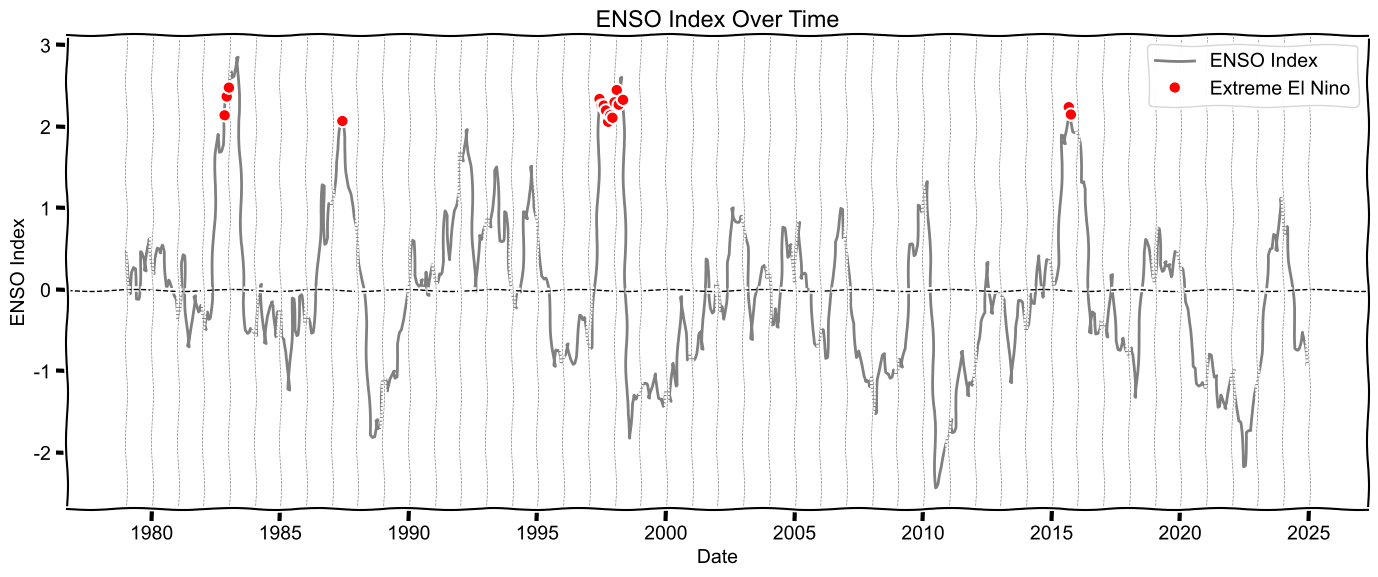

In [5]:
import pandas as pd
# Conditions for highlighting la Nina extreme events
extreme_mask_nino = (df_long['ENSO_Index'] >= ensoLB) & (df_long['ENSO_Index'] < ensoUB)

# Plot
plt.figure(figsize=(14, 6))
plt.plot(df_long['Date'], df_long['ENSO_Index'], color='gray', label='ENSO Index')
plt.axhline(0, color='black', linestyle='--', linewidth=1)
years = pd.date_range(start='1979', end='2025', freq='YS')
for year in years:
    plt.axvline(x=year, color='gray', linestyle='--', linewidth=0.5)

# Highlight extremes
plt.plot(df_long.loc[extreme_mask_nino, 'Date'],
         df_long.loc[extreme_mask_nino, 'ENSO_Index'],
         color='red', linestyle='none', marker='o', label='Extreme El Nino')

plt.title('ENSO Index Over Time')
plt.xlabel('Date')
plt.ylabel('ENSO Index')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



save extreme values as new variable in netcdf format

In [6]:
# Select extreme values El Nino
extreme_nino_df = df_long[extreme_mask_nino].copy()
extreme_nino_df.set_index('Date', inplace=True)


# Convert to xarray Dataset
ds_nino = xr.Dataset(
    {"enso_index": ("time", extreme_nino_df['ENSO_Index'].values)},
    coords={"time": extreme_nino_df.index}
)


# build the output path using ensoLB and ensoUB values
nc_path_enso_extr = f"/Users/marie-audepradal/Documents/{ensoLB}nino{ensoUB}.nc"
# save to NetCDF
ds_nino.to_netcdf(nc_path_enso_extr)
#ds_nino.to_netcdf("/Users/marie-audepradal/Documents/{ensoLB}_nino_{ensoUB}.nc")
# 2) save as txt file 
# Build the output path using ensoLB
txt_path = f"/Users/marie-audepradal/Documents/{ensoLB}_nino_{ensoUB}.txt"

df_nino = ds_nino.to_dataframe()
df_nino.to_csv(txt_path, index=True)



read ERA5 data from a netcdf file

In [7]:
file_path = "/Users/marie-audepradal/Documents/ERA5SST.nc"
era5_ds = xr.open_dataset(file_path)
file_path = "/Users/marie-audepradal/Documents/1970-2024_tpe_ERA5Land_monthly.nc"
era5L_ds = xr.open_dataset(file_path)

In [8]:
#file_path=  "/Users/marie-audepradal/Documents/{ensoLB}nino{ensoLB}.nc"
#nino15_ds = xr.open_dataset(file_path)

#nc_path_nino_extr = f"/Users/marie-audepradal/Documents/{ensoLB}_nino_{ensoUB}.nc"

# Open the file
nino15_ds = xr.open_dataset(nc_path_enso_extr)

In [9]:
# Extract time values from both datasets
era5_times = era5_ds['valid_time']
era5L_times = era5L_ds['valid_time']
nino15_times = nino15_ds['time']

# Find common timestamps
matching_nino = np.intersect1d(era5L_times.values, nino15_times.values)

# Select the corresponding entries from the enso2023 dataset
matching_nino15_data = era5_ds.sel(valid_time=matching_nino)



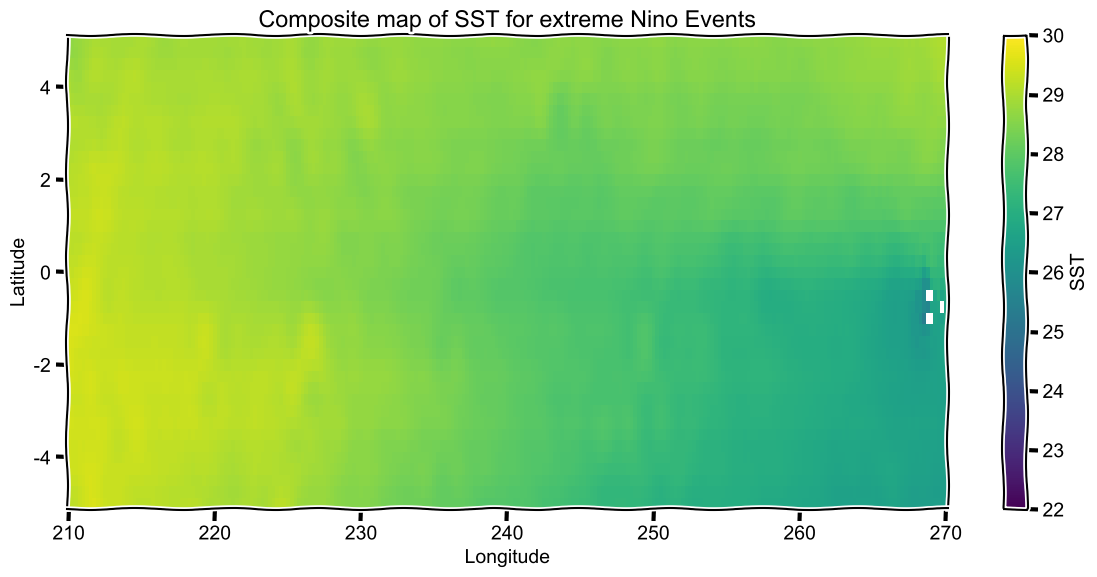

In [10]:
# Compute the average over time of the matched nino extreme events

mean_sstKo = matching_nino15_data['sst'].mean(dim='valid_time')
mean_ssto = mean_sstKo.sel(latitude=slice(5, -5), longitude=slice(210, 270)) - 273.15


# For better visualization, focus on Nino 3 region. 
# plot the composite SST for extreme Nino 

# Plot the 2D map
plt.figure(figsize=(12, 6))
plt.pcolormesh(mean_ssto['longitude'], mean_ssto['latitude'], mean_ssto, shading='auto', cmap='viridis', vmin=22,
    vmax=30)
plt.colorbar(label='SST')
plt.title('Composite map of SST for extreme Nino Events')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.tight_layout()
plt.show()



In [11]:

# Load NetCDF data
ds_ERA5L = xr.open_dataset("/Users/marie-audepradal/Documents/1970-2024_tpe_ERA5Land_monthly.nc")  # Replace with your file path

# 2. Identify which variable holds temperature
#    (in your file it’s “t2m”, but this will print all data_vars)
print("Data variables in the file:", list(ds_ERA5L.data_vars))
# → e.g. ['t2m']

# 3. Select the temperature DataArray
temp = ds_ERA5L['t2m']
tp = ds_ERA5L['tp']

# 4. Compute the monthly climatology over valid_time
#    (group by the month of the timestamp and take the mean across all years)
#temp_clim = temp.groupby('valid_time.month').mean(dim='valid_time')
#tp_clim = tp.groupby('valid_time.month').mean(dim='valid_time')
#temp_clim.name = 't2m_climatology'
#tp_clim.name = 'precip_climatology'

# 5. Save the result to a new NetCDF
#temp_output_path = '/Users/marie-audepradal/Documents/temp_climatology_1970-2024_ERA5Land_monthly.nc'
#temp_clim.to_netcdf(temp_output_path)
#print(f"Monthly climatology written to: {temp_output_path}")
#tp_output_path = '/Users/marie-audepradal/Documents/precip_climatology_1970-2024_ERA5Land_monthly.nc'
#tp_clim.to_netcdf(tp_output_path)
#print(f"Monthly climatology written to: {tp_output_path}")
#print(temp_clim)
#print(tp_clim)


Data variables in the file: ['t2m', 'tp']


In [ ]:
import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import rasterio
from rasterio import features
from rasterio.transform import from_origin
import fiona
from shapely.geometry import shape, Polygon, MultiPolygon, box
from shapely.ops import transform
import xarray as xr
import numpy as np

# Re-open the datasets
ds_nino = xr.open_dataset(nc_path_enso_extr)
ds_t2 = xr.open_dataset('/Users/marie-audepradal/Documents/1970-2024_tpe_ERA5Land_monthly.nc')

# Identify the appropriate time variables
times_nino = ds_nino['time'].values
# ERA5-Land t2m uses 'valid_time' instead of 'time'
times_t2 = ds_t2['valid_time'].values

print("Nino dataset time coordinates:")
print(times_nino)

print("\nERA5-Land t2m dataset valid_time coordinates:")
print(times_t2)

# Find the common times between the two datasets
common_times = np.intersect1d(times_t2, times_nino)

print(f"\nCommon times ({len(common_times)} entries):")
print(common_times)

# Select t2m data for those common times
if 't2m' in ds_t2:
    t2m_var = 't2m'
else:
    # List variables if 't2m' not found
    print("\nVariables in ERA5-Land dataset:", list(ds_t2.data_vars))
    t2m_var = list(ds_t2.data_vars)[0]  # fallback

# Subset using valid_time as the coordinate
ds_t2_sel = ds_t2.sel(valid_time=common_times)[[t2m_var]]

# Save the subset to a new NetCDF file
output_path = '/Users/marie-audepradal/Documents/t2m_matched_times.nc'
ds_t2_sel.to_netcdf(output_path)


print(f"\nSubset t2m data saved to: {output_path}")
print(ds_t2_sel)

#select precipitation data
# Select tp data for those common times
if 'tp' in ds_t2:
    tp_var = 'tp'
else:
    # List variables if 'tp' not found
    print("\nVariables in ERA5-Land dataset:", list(ds_t2.data_vars))
    tp_var = list(ds_t2.data_vars)[0]  # fallback

# Subset using valid_time as the coordinate
ds_tp_sel = ds_t2.sel(valid_time=common_times)[[tp_var]]

# Save the subset to a new NetCDF file
output_path = '/Users/marie-audepradal/Documents/tp_matched_times.nc'
ds_tp_sel.to_netcdf(output_path)

#just a sanity check: times should be identical for both variables
print(f"\nSubset t2m  and tp data saved to: {output_path}")
print(ds_t2_sel)
print(ds_tp_sel)


In [13]:
ds_matched = xr.open_dataset('/Users/marie-audepradal/Documents/t2m_matched_times.nc')
ds_matched
ds_tp_matched = xr.open_dataset('/Users/marie-audepradal/Documents/tp_matched_times.nc')

/var/folders/sr/0fxh2nn57rv_jfz1srn_p_zw0000gn/T/ipykernel_12149/1784923071.py:116: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  n_times = ds_matched.dims['valid_time']


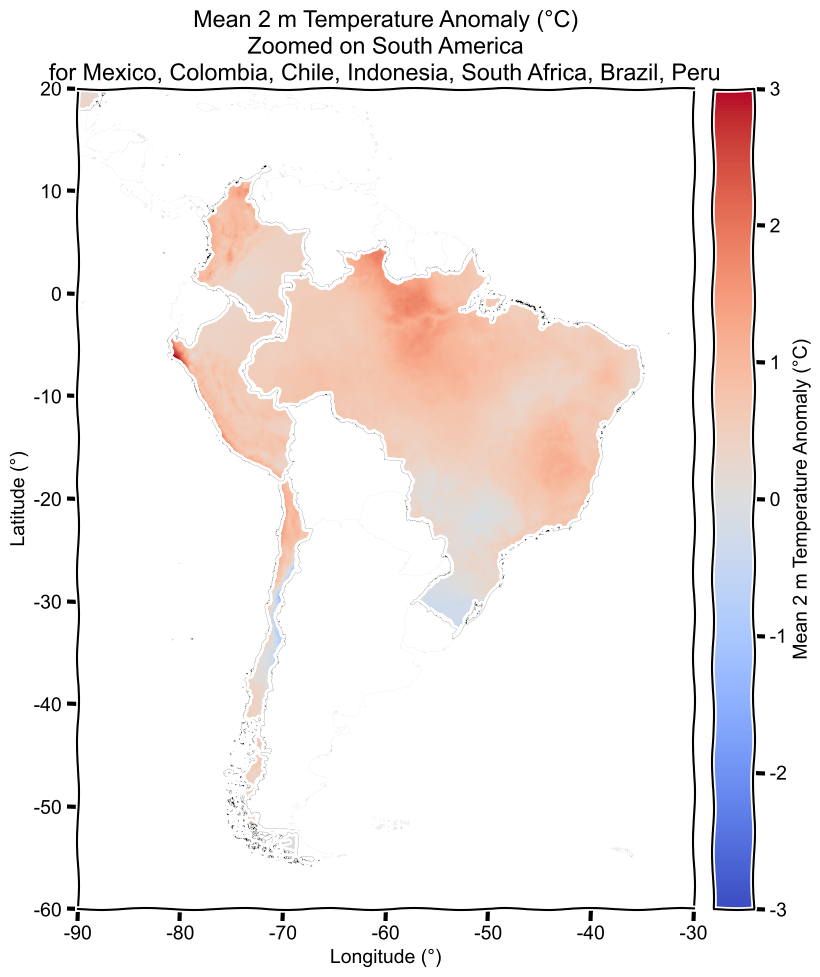

In [ ]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import rasterio
from rasterio import features
from rasterio.transform import from_origin
import fiona
from shapely.geometry import shape, Polygon, MultiPolygon

# --------------------------------------------------------------------------------
# 1. Load the “matched‐times” t2m file
# --------------------------------------------------------------------------------
ds_matched = xr.open_dataset('/Users/marie-audepradal/Documents/t2m_matched_times.nc')
# “t2m” is in Kelvin, dims = (valid_time, latitude, longitude)

# --------------------------------------------------------------------------------
# 2. Load the monthly climatology (1970–2024)
# --------------------------------------------------------------------------------
clim_path = '/Users/marie-audepradal/Documents/temp_climatology_1970-2024_ERA5Land_monthly.nc'
ds_clim = xr.open_dataset(clim_path)
# dims = (month, latitude, longitude), variable = 't2m_climatology' in K

# --------------------------------------------------------------------------------
# 3. Load country shapefile & extract geometries for six countries
# --------------------------------------------------------------------------------
shapefile_path = '/Users/marie-audepradal/Documents/WB_countries_Admin0_10m.shp'
with fiona.open(shapefile_path) as shp:
    mexico_geom = None
    colombia_geom = None
    chile_geom = None
    indonesia_geom = None
    south_africa_geom = None
    brazil_geom = None
    peru_geom = None
    world_geoms = []

    for feature in shp:
        props = feature['properties']
        geom = shape(feature['geometry'])
        world_geoms.append(geom)
        name = props.get('NAME_EN') or props.get('WB_NAME')

        if name == 'Mexico':
            mexico_geom = geom
        elif name == 'Colombia':
            colombia_geom = geom
        elif name == 'Chile':
            chile_geom = geom
        elif name == 'Indonesia':
            indonesia_geom = geom
        elif name in ('South Africa', 'Republic of South Africa'):
            south_africa_geom = geom
        elif name == 'Brazil':
            brazil_geom = geom
        elif name == 'Peru':
            peru_geom = geom

for nm, geom in [
    ('Mexico', mexico_geom),
    ('Colombia', colombia_geom),
    ('Chile', chile_geom),
    ('Indonesia', indonesia_geom),
    ('South Africa', south_africa_geom),
    ('Brazil', brazil_geom),
    ('Peru', peru_geom),
]:
    if geom is None:
        raise ValueError(f"{nm} geometry not found in shapefile.")

# --------------------------------------------------------------------------------
# 4. Prepare (lon, lat) grid & affine transform
# --------------------------------------------------------------------------------
lons_full = ds_matched['longitude'].values.copy()  # probably 0→359.9
lats      = ds_matched['latitude'].values.copy()   #  90→-90

# Convert 0–360 → -180–180 if needed
if lons_full.min() >= 0:
    lons_mod = (lons_full + 180) % 360 - 180
    order = np.argsort(lons_mod)
    lons = lons_mod[order]
else:
    lons = lons_full.copy()
    order = np.arange(len(lons))

dx = float(lons[1] - lons[0])
dy = float(abs(lats[1] - lats[0]))

west  = float(lons.min())
north = float(lats.max())
transform_grid = from_origin(west, north, dx, dy)

shape_out   = (len(lats), len(lons))
lon_grid, lat_grid = np.meshgrid(lons, lats)

# --------------------------------------------------------------------------------
# 5. Rasterize each country into a 0/1 mask
# --------------------------------------------------------------------------------
mask_mexico       = features.rasterize([(mexico_geom, 1)], out_shape=shape_out,
                                        transform=transform_grid, fill=0, dtype=np.uint8)
mask_colombia     = features.rasterize([(colombia_geom, 1)], out_shape=shape_out,
                                        transform=transform_grid, fill=0, dtype=np.uint8)
mask_chile        = features.rasterize([(chile_geom, 1)], out_shape=shape_out,
                                        transform=transform_grid, fill=0, dtype=np.uint8)
mask_indonesia    = features.rasterize([(indonesia_geom, 1)], out_shape=shape_out,
                                        transform=transform_grid, fill=0, dtype=np.uint8)
mask_south_africa = features.rasterize([(south_africa_geom, 1)], out_shape=shape_out,
                                        transform=transform_grid, fill=0, dtype=np.uint8)
mask_brazil       = features.rasterize([(brazil_geom, 1)], out_shape=shape_out,
                                        transform=transform_grid, fill=0, dtype=np.uint8)
mask_peru      = features.rasterize([(peru_geom, 1)], out_shape=shape_out,
                                        transform=transform_grid, fill=0, dtype=np.uint8)

# --------------------------------------------------------------------------------
# 6. Subtract monthly climatology at each time → accumulate anomaly
# --------------------------------------------------------------------------------
n_times = ds_matched.dims['valid_time']
sum_anomaly = np.zeros((len(lats), len(lons)), dtype=np.float64)

for ti, timestamp in enumerate(ds_matched['valid_time'].values):
    t2m_slice = ds_matched['t2m'].isel(valid_time=ti).values  # shape = (nlat, nlon_full)
    # reorder longitudes if needed
    if lons_full.min() >= 0:
        t2m_reordered = t2m_slice[:, order]
    else:
        t2m_reordered = t2m_slice.copy()

    # extract month (1–12)
    month = int(str(np.datetime64(timestamp, 'M'))[5:7])

    # climatology slice (in K)
    clim_slice = ds_clim['t2m_climatology'].isel(month=month - 1).values  # (nlat, nlon_full)
    if lons_full.min() >= 0:
        clim_reordered = clim_slice[:, order]
    else:
        clim_reordered = clim_slice.copy()

    anomaly_this = t2m_reordered - clim_reordered
    sum_anomaly += anomaly_this

mean_anomaly = sum_anomaly / float(n_times)  # shape = (nlat, nlon), in K (≡ °C numerically)

# --------------------------------------------------------------------------------
# 7. Mask each country’s anomaly & find common vmin/vmax
# --------------------------------------------------------------------------------
anom_mexico       = np.where(mask_mexico       == 1, mean_anomaly, np.nan)
anom_colombia     = np.where(mask_colombia     == 1, mean_anomaly, np.nan)
anom_chile        = np.where(mask_chile        == 1, mean_anomaly, np.nan)
anom_indonesia    = np.where(mask_indonesia    == 1, mean_anomaly, np.nan)
anom_south_africa = np.where(mask_south_africa == 1, mean_anomaly, np.nan)
anom_brazil       = np.where(mask_brazil       == 1, mean_anomaly, np.nan)
anom_peru         = np.where(mask_peru         == 1, mean_anomaly, np.nan)

all_vals = np.concatenate([
    anom_mexico[np.isfinite(anom_mexico)].ravel(),
    anom_colombia[np.isfinite(anom_colombia)].ravel(),
    anom_chile[np.isfinite(anom_chile)].ravel(),
    anom_indonesia[np.isfinite(anom_indonesia)].ravel(),
    anom_south_africa[np.isfinite(anom_south_africa)].ravel(),
    anom_brazil[np.isfinite(anom_brazil)].ravel(),
    anom_peru[np.isfinite(anom_peru)].ravel(),
])
vmin = np.nanmin(all_vals)
vmax = np.nanmax(all_vals)

# --------------------------------------------------------------------------------
# 8. Plot one map, zoomed on South America
# --------------------------------------------------------------------------------
fig, ax = plt.subplots(figsize=(10, 10))

# 8.1 Plot all world boundaries faintly
for geom in world_geoms:
    if isinstance(geom, MultiPolygon):
        for poly in geom.geoms:
            x, y = poly.exterior.xy
            ax.plot(x, y, color='black', linewidth=0.1)
    else:
        x, y = geom.exterior.xy
        ax.plot(x, y, color='black', linewidth=0.1)

# 8.2 Plot each country’s anomaly (°C) with the common vmin/vmax
vmin=-3
vmax=3
ax.pcolormesh(lon_grid, lat_grid, anom_mexico,
              cmap='coolwarm', shading='auto', vmin=vmin, vmax=vmax)
ax.pcolormesh(lon_grid, lat_grid, anom_colombia,
              cmap='coolwarm', shading='auto', vmin=vmin, vmax=vmax)
ax.pcolormesh(lon_grid, lat_grid, anom_chile,
              cmap='coolwarm', shading='auto', vmin=vmin, vmax=vmax)
ax.pcolormesh(lon_grid, lat_grid, anom_indonesia,
              cmap='coolwarm', shading='auto', vmin=vmin, vmax=vmax)
ax.pcolormesh(lon_grid, lat_grid, anom_south_africa,
              cmap='coolwarm', shading='auto', vmin=vmin, vmax=vmax)
ax.pcolormesh(lon_grid, lat_grid, anom_brazil,
              cmap='coolwarm', shading='auto', vmin=vmin, vmax=vmax)
ax.pcolormesh(lon_grid, lat_grid, anom_peru,
              cmap='coolwarm', shading='auto', vmin=vmin, vmax=vmax)


# 8.3 Overlay thick black boundaries for each country
def plot_boundary(geom, lw=1.2):
    if isinstance(geom, MultiPolygon):
        for poly in geom.geoms:
            x, y = poly.exterior.xy
            ax.plot(x, y, color='black', linewidth=0.1)
    else:
        x, y = geom.exterior.xy
        ax.plot(x, y, color='black', linewidth=0.1)

plot_boundary(mexico_geom)
plot_boundary(colombia_geom)
plot_boundary(chile_geom)
plot_boundary(indonesia_geom)
plot_boundary(south_africa_geom)
plot_boundary(brazil_geom)
plot_boundary(peru_geom)

# 8.4 Colorbar
cbar = plt.colorbar(plt.cm.ScalarMappable(cmap='coolwarm', norm=plt.Normalize(vmin=vmin, vmax=vmax)),
                    ax=ax, orientation='vertical', pad=0.02)
cbar.set_label('Mean 2 m Temperature Anomaly (°C)')

# 8.5 ZOOM onto South America:
ax.set_xlim(-90, -30)   # approximate lon‐bounds for South America
ax.set_ylim(-60,  20)   # approximate lat‐bounds for South America

ax.set_aspect('equal', adjustable='box')
ax.set_xlabel('Longitude (°)')
ax.set_ylabel('Latitude (°)')
ax.set_title(
    'Mean 2 m Temperature Anomaly (°C)\n'
    'Zoomed on South America\n'
    'for Mexico, Colombia, Chile, Indonesia, South Africa, Brazil, Peru'
)

plt.tight_layout()
out_path = f"/Users/marie-audepradal/Documents/{ensoLB}_enso_bounded_by_{ensoUB}.png"
plt.savefig(out_path, dpi=600)
#"plt.savefig('/Users/marie-audepradal/Desktop/{ensoLB}enso{ensoUB}.png', dpi=200)
plt.show()


/var/folders/sr/0fxh2nn57rv_jfz1srn_p_zw0000gn/T/ipykernel_12149/2524243485.py:81: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  n_times = ds_matched.dims['valid_time']


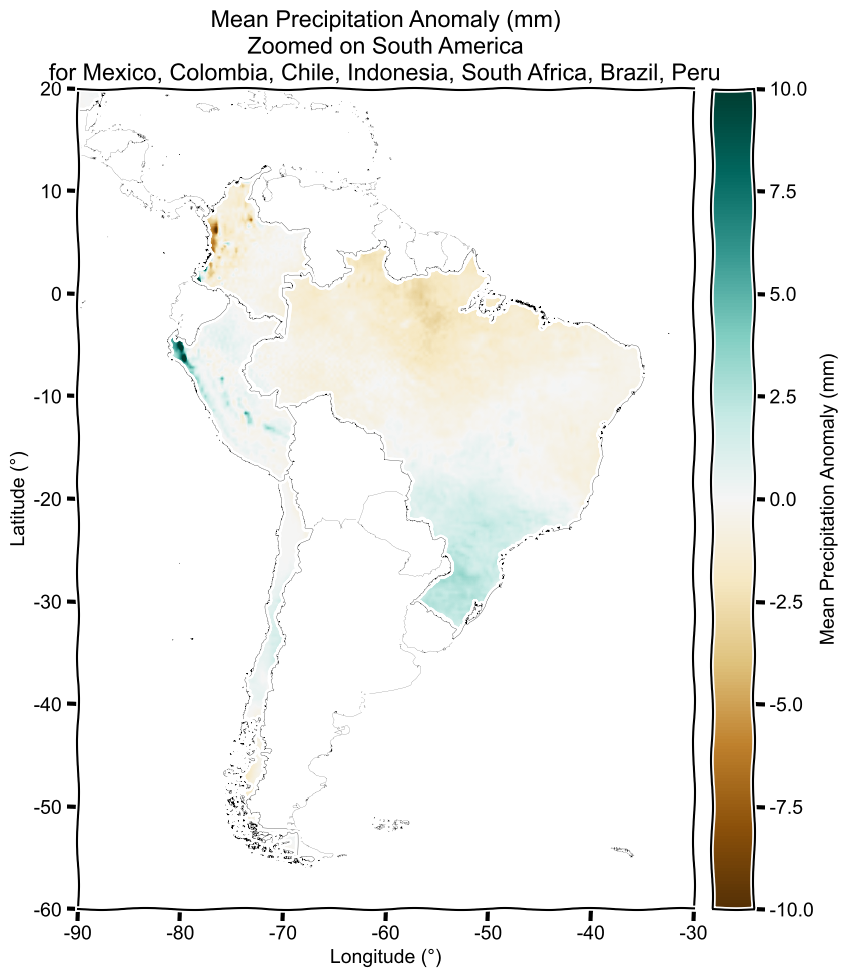

In [35]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import rasterio
from rasterio import features
from rasterio.transform import from_origin
import fiona
from shapely.geometry import shape, Polygon, MultiPolygon

# --------------------------------------------------------------------------------
# 1. Load the “matched‐times” tp file
# --------------------------------------------------------------------------------
ds_matched = xr.open_dataset('/Users/marie-audepradal/Documents/tp_matched_times.nc')
# “tp” is in mm, dims = (valid_time, latitude, longitude)

# --------------------------------------------------------------------------------
# 2. Load the monthly precipitation climatology (1970–2024)
# --------------------------------------------------------------------------------
clim_path = '/Users/marie-audepradal/Documents/precip_climatology_1970-2024_ERA5Land_monthly.nc'
ds_clim = xr.open_dataset(clim_path)
# dims = (month, latitude, longitude), variable = 'precip_climatology' in mm

# --------------------------------------------------------------------------------
# 3. Load country shapefile & extract geometries for six countries
# --------------------------------------------------------------------------------
shapefile_path = '/Users/marie-audepradal/Documents/WB_countries_Admin0_10m.shp'
with fiona.open(shapefile_path) as shp:
    countries = {
        'Mexico': None, 'Colombia': None, 'Chile': None, 'Indonesia': None,
        'South Africa': None, 'Brazil': None, 'Peru': None
    }
    world_geoms = []

    for feature in shp:
        props = feature['properties']
        geom = shape(feature['geometry'])
        world_geoms.append(geom)
        name = props.get('NAME_EN') or props.get('WB_NAME')

        if name in countries:
            countries[name] = geom
        elif name == 'Republic of South Africa':
            countries['South Africa'] = geom

for name, geom in countries.items():
    if geom is None:
        raise ValueError(f"{name} geometry not found in shapefile.")

# --------------------------------------------------------------------------------
# 4. Prepare (lon, lat) grid & affine transform
# --------------------------------------------------------------------------------
lons_full = ds_matched['longitude'].values.copy()
lats = ds_matched['latitude'].values.copy()

if lons_full.min() >= 0:
    lons_mod = (lons_full + 180) % 360 - 180
    order = np.argsort(lons_mod)
    lons = lons_mod[order]
else:
    lons = lons_full.copy()
    order = np.arange(len(lons))

dx = float(lons[1] - lons[0])
dy = float(abs(lats[1] - lats[0]))
transform_grid = from_origin(float(lons.min()), float(lats.max()), dx, dy)
shape_out = (len(lats), len(lons))
lon_grid, lat_grid = np.meshgrid(lons, lats)

# --------------------------------------------------------------------------------
# 5. Rasterize each country into a 0/1 mask
# --------------------------------------------------------------------------------
masks = {
    name: features.rasterize([(geom, 1)], out_shape=shape_out,
                             transform=transform_grid, fill=0, dtype=np.uint8)
    for name, geom in countries.items()
}

# --------------------------------------------------------------------------------
# 6. Subtract monthly climatology from each time step → accumulate anomaly
# --------------------------------------------------------------------------------
n_times = ds_matched.dims['valid_time']
sum_anomaly = np.zeros((len(lats), len(lons)), dtype=np.float64)

for ti, timestamp in enumerate(ds_matched['valid_time'].values):
    tp_slice = ds_matched['tp'].isel(valid_time=ti).values
    tp_reordered = tp_slice[:, order] if lons_full.min() >= 0 else tp_slice.copy()

    month = int(str(np.datetime64(timestamp, 'M'))[5:7])
    clim_slice = ds_clim['precip_climatology'].isel(month=month - 1).values
    clim_reordered = clim_slice[:, order] if lons_full.min() >= 0 else clim_slice.copy()

    anomaly_this = tp_reordered - clim_reordered
    sum_anomaly += anomaly_this

mean_anomaly = sum_anomaly / float(n_times)  # units: mm

# --------------------------------------------------------------------------------
# 7. Mask each country’s anomaly & compute color scale bounds
# --------------------------------------------------------------------------------
anomalies = {
    name: np.where(mask == 1, mean_anomaly, np.nan)
    for name, mask in masks.items()
}

all_vals = np.concatenate([arr[np.isfinite(arr)].ravel() for arr in anomalies.values()])
vmin = np.nanmin(all_vals)
vmax = np.nanmax(all_vals)

# --------------------------------------------------------------------------------
# 8. Plot one map, zoomed on South America
# --------------------------------------------------------------------------------
fig, ax = plt.subplots(figsize=(10, 10))

for geom in world_geoms:
    if isinstance(geom, MultiPolygon):
        for poly in geom.geoms:
            x, y = poly.exterior.xy
            ax.plot(x, y, color='black', linewidth=0.1)
    else:
        x, y = geom.exterior.xy
        ax.plot(x, y, color='black', linewidth=0.1)

# Plot anomalies
vmin, vmax = -10, 10  # Adjust for expected range in mm
for name, data in anomalies.items():
    ax.pcolormesh(lon_grid, lat_grid, data*1000, cmap='BrBG', shading='auto', vmin=vmin, vmax=vmax)

# Overlay country boundaries
def plot_boundary(geom, lw=1.2):
    if isinstance(geom, MultiPolygon):
        for poly in geom.geoms:
            x, y = poly.exterior.xy
            ax.plot(x, y, color='black', linewidth=0.2)
    else:
        x, y = geom.exterior.xy
        ax.plot(x, y, color='black', linewidth=0.2)

for geom in countries.values():
    plot_boundary(geom)

# Colorbar
cbar = plt.colorbar(plt.cm.ScalarMappable(cmap='BrBG', norm=plt.Normalize(vmin=vmin, vmax=vmax)),
                    ax=ax, orientation='vertical', pad=0.02)
cbar.set_label('Mean Precipitation Anomaly (mm)')

# Zoom on South America
ax.set_xlim(-90, -30)
ax.set_ylim(-60, 20)
ax.set_aspect('equal', adjustable='box')
ax.set_xlabel('Longitude (°)')
ax.set_ylabel('Latitude (°)')
ax.set_title(
    'Mean Precipitation Anomaly (mm)\n'
    'Zoomed on South America\n'
    'for Mexico, Colombia, Chile, Indonesia, South Africa, Brazil, Peru'
)

plt.tight_layout()
out_path = "/Users/marie-audepradal/Documents/tp_anomaly_SA.png"
plt.savefig(out_path, dpi=600)
plt.show()


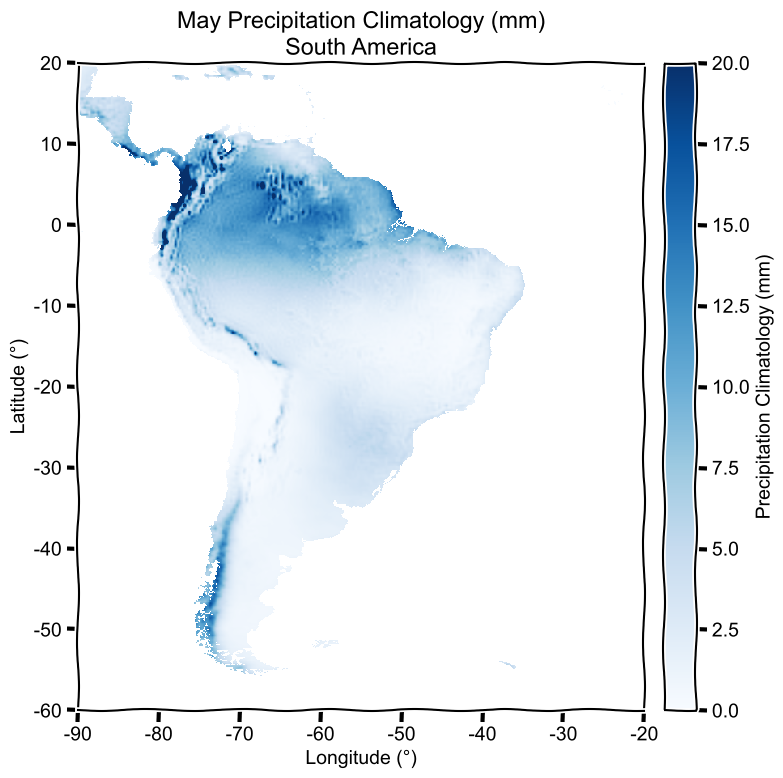

In [48]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

# Load the climatology dataset
clim_path = '/Users/marie-audepradal/Documents/precip_climatology_1970-2024_ERA5Land_monthly.nc'
ds_clim = xr.open_dataset(clim_path)

# Extract January (month index 0)
may_precip = ds_clim['precip_climatology'].isel(month=4)

# Extract coordinates
lats = ds_clim['latitude'].values
lons_full = ds_clim['longitude'].values

# Convert longitudes if needed
if lons_full.min() >= 0:
    lons = (lons_full + 180) % 360 - 180
    order = np.argsort(lons)
    may_precip = may_precip.values[:, order]*1000
    lons = lons[order]
else:
    may_precip = may_precip.values
    lons = lons_full

# Create meshgrid
lon_grid, lat_grid = np.meshgrid(lons, lats)

# Plotting
fig, ax = plt.subplots(figsize=(10, 8))
pc = ax.pcolormesh(lon_grid, lat_grid, may_precip,
                   cmap='Blues', shading='auto', vmin=0, vmax=20)

# Colorbar
cbar = plt.colorbar(pc, ax=ax, orientation='vertical', pad=0.02)
cbar.set_label('Precipitation Climatology (mm)')

# Zoom on South America
ax.set_xlim(-90, -20)
ax.set_ylim(-60, 20)

ax.set_title('May Precipitation Climatology (mm)\nSouth America')
ax.set_xlabel('Longitude (°)')
ax.set_ylabel('Latitude (°)')
ax.set_aspect('equal', adjustable='box')

plt.tight_layout()
plt.show()


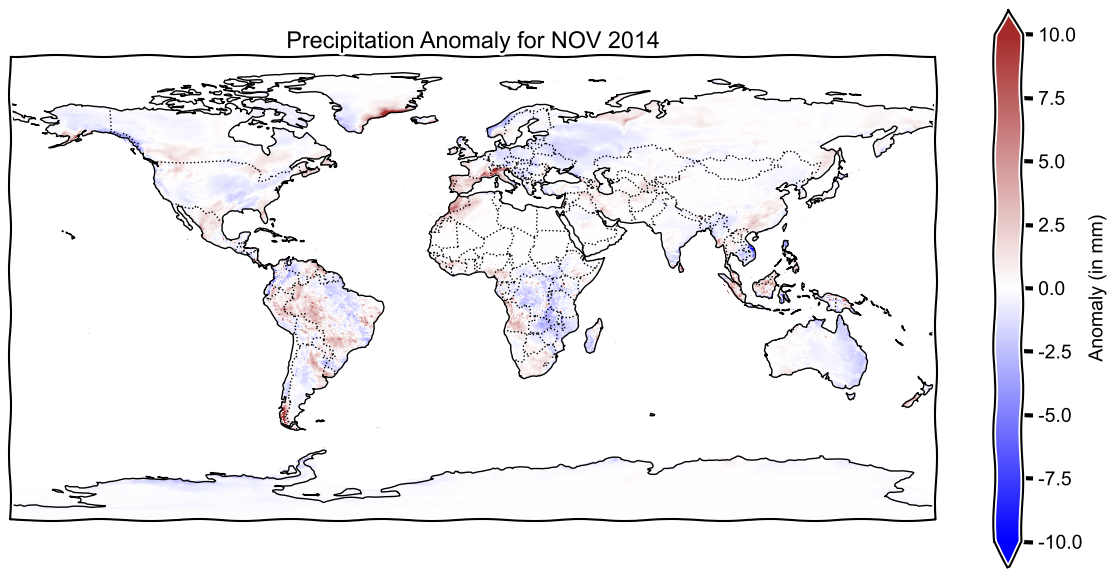

In [113]:
import xarray as xr
import matplotlib.pyplot as plt

# Load the datasets
ds_1983 = xr.open_dataset('/Users/marie-audepradal/Documents/1970-2024_tpe_ERA5Land_monthly.nc')
ds_clim = xr.open_dataset('/Users/marie-audepradal/Documents/precip_climatology_1970-2024_ERA5Land_monthly.nc')

# Select the March 1983 t2m data using the 'valid_time' coordinate
t2m_mar1983 = ds_1983['tp'].sel(valid_time='2014-11-01')
# Select the climatological t2m for March (month=3)
t2m_clim_mar = ds_clim['precip_climatology'].sel(month=11)

# Compute the anomaly
anomaly = (t2m_mar1983)*1000 - (t2m_clim_mar)*1000

# Plot the anomaly
#plt.figure(figsize=(12, 6))
#anomaly.plot()
#plt.title('Precipitation Anomaly ')
#plt.show()
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Define the custom colormap and normalization
cmap = mcolors.LinearSegmentedColormap.from_list(
    "custom_diverging",
    ["blue", "white", "brown"],
    N=256
)
norm = mcolors.TwoSlopeNorm(vmin=-10, vcenter=0, vmax=10)

# Plot with Cartopy
plt.figure(figsize=(12, 6))
ax = plt.axes(projection=ccrs.PlateCarree())  # Use PlateCarree for regular lat/lon grids
anomaly.plot(ax=ax, transform=ccrs.PlateCarree(), cmap=cmap, norm=norm, cbar_kwargs={'label': 'Anomaly (in mm)'})
ax.coastlines()
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.set_title('Precipitation Anomaly for NOV 2014')
# Save the figure
plt.tight_layout()
out_path = "/Users/marie-audepradal/Desktop/precip_anom_NOV2014.png"
plt.savefig(out_path, dpi=600)
plt.show()

In [117]:
from PIL import Image
import os

# List of PNG files to combine, replace with your actual file paths
png_files = ["/Users/marie-audepradal/Desktop/precip_anom_NOV2014.png", "/Users/marie-audepradal/Desktop/precip_anom_JAN2015.png", "/Users/marie-audepradal/Desktop/precip_anom_APR2015.png", "/Users/marie-audepradal/Desktop/precip_anom_NOV2015.png", "/Users/marie-audepradal/Desktop/precip_anom_JAN2016.png","/Users/marie-audepradal/Desktop/precip_anom_APR2016.png"]

# Open all images and convert to RGB (PDFs don't support alpha channel)
images = [Image.open(f).convert("RGB") for f in png_files]

# Save as a single PDF
if images:
    images[0].save("/Users/marie-audepradal/Desktop/output.pdf", save_all=True, append_images=images[1:])
